In [1]:
#Market Basket Analysis

In [2]:
#Market Basket Analysis is the process of discovering frequent item sets in large transactional database is called market basket analysis.

In [ ]:
#Example:

#Market basket analysis might tell a retailer that customers often purchase colgate toothpaste and brush together, 
#so putting both items on promotion at the same time would not create a significant increase in revenue, while a promotion involving just one of the items would likely drive sales of the other.

In [3]:
#Assosciation rules are produced using algorithms like :

#1. Apriori Algorithm

#2. Eclat Algorithm

#3. FP-growth Algorithm

In [4]:
#Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
#rest of the libraries will be imported were ever necessary
import warnings
warnings.filterwarnings('ignore')

In [14]:
#1. Apriori Algorithm

In [54]:
df1=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 3\\Sem_Preparation\\form.csv')
df1.head()

,Timestamp,Name,Item 1,Item 2,Item 3
0,2019/09/17 8:58:22 AM GMT+7,Firdaus Adi Nugroho,HP,Racket,Watch
1,2019/09/17 8:58:24 AM GMT+7,faizah,HP,Camera,Watch
2,2019/09/17 8:58:30 AM GMT+7,andrem,Watch,Camera,Music Pad
3,2019/09/17 8:58:30 AM GMT+7,laili,Camera,Watch,Mouse
4,2019/09/17 8:58:33 AM GMT+7,Tara,HP,Watch,Music Pad


In [55]:
df1.shape

(24, 5)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  24 non-null     object
 1   Name       24 non-null     object
 2   Item 1     24 non-null     object
 3   Item 2     24 non-null     object
 4   Item 3     19 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [57]:
df1=df1.drop(['Timestamp','Name'],axis=1)#dropping unwanted columns
df1.head()

,Item 1,Item 2,Item 3
0,HP,Racket,Watch
1,HP,Camera,Watch
2,Watch,Camera,Music Pad
3,Camera,Watch,Mouse
4,HP,Watch,Music Pad


In [58]:
df1.isnull().sum()#checking for null values

Item 1    0
Item 2    0
Item 3    5
dtype: int64

In [59]:
df1=df1.fillna('NA')#filled  the null values with NA

In [60]:
#Creating a list in the list of goods purchase transactions

In [62]:
df1.values#Only the values in the DataFrame will be returned, the axes labels will be removed.

array([['HP', 'Racket', 'Watch'],
       ['HP', 'Camera', 'Watch'],
       ['Watch', 'Camera', 'Music Pad'],
       ['Camera', 'Watch', 'Mouse'],
       ['HP', 'Watch', 'Music Pad'],
       ['Watch', 'Racket', 'Camera'],
       ['HP', 'Camera', 'Watch'],
       ['Watch', 'Camera', 'Music Pad'],
       ['Racket', 'Soap', 'Guitar'],
       ['Racket', 'Camera', 'Guitar'],
       ['Camera', 'Bag', 'NA'],
       ['Music Pad', 'Guitar', 'Camera'],
       ['Camera', 'Watch', 'NA'],
       ['Guitar', 'Camera', 'Music Pad'],
       ['Camera', 'Watch', 'Music Pad'],
       ['Camera', 'Racket', 'Guitar'],
       ['Guitar', 'Camera', 'Watch'],
       ['Guitar', 'Watch', 'NA'],
       ['Camera', 'Watch', 'NA'],
       ['Soap', 'Bag', 'Guitar'],
       ['Router', 'Bag', 'NA'],
       ['Watch', 'Racket', 'Soap'],
       ['Music Pad', 'Soap', 'Watch'],
       ['Mouse', 'Camera', 'Soap']], dtype=object)

In [65]:
records=df1.values.tolist()#converting array to list
records

[['HP', 'Racket', 'Watch'],
 ['HP', 'Camera', 'Watch'],
 ['Watch', 'Camera', 'Music Pad'],
 ['Camera', 'Watch', 'Mouse'],
 ['HP', 'Watch', 'Music Pad'],
 ['Watch', 'Racket', 'Camera'],
 ['HP', 'Camera', 'Watch'],
 ['Watch', 'Camera', 'Music Pad'],
 ['Racket', 'Soap', 'Guitar'],
 ['Racket', 'Camera', 'Guitar'],
 ['Camera', 'Bag', 'NA'],
 ['Music Pad', 'Guitar', 'Camera'],
 ['Camera', 'Watch', 'NA'],
 ['Guitar', 'Camera', 'Music Pad'],
 ['Camera', 'Watch', 'Music Pad'],
 ['Camera', 'Racket', 'Guitar'],
 ['Guitar', 'Camera', 'Watch'],
 ['Guitar', 'Watch', 'NA'],
 ['Camera', 'Watch', 'NA'],
 ['Soap', 'Bag', 'Guitar'],
 ['Router', 'Bag', 'NA'],
 ['Watch', 'Racket', 'Soap'],
 ['Music Pad', 'Soap', 'Watch'],
 ['Mouse', 'Camera', 'Soap']]

In [67]:
from mlxtend.preprocessing import TransactionEncoder

In [68]:
# TransactionEncoder :Encoder class for transaction data in Python lists

In [119]:
TE=TransactionEncoder()
X=TE.fit_transform(records)
df2=pd.DataFrame(X,columns=TE.columns_)

In [120]:
df2.head()

,Bag,Camera,Guitar,HP,Mouse,Music Pad,NA,Racket,Router,Soap,Watch
0,False,False,False,True,False,False,False,True,False,False,True
1,False,True,False,True,False,False,False,False,False,False,True
2,False,True,False,False,False,True,False,False,False,False,True
3,False,True,False,False,True,False,False,False,False,False,True
4,False,False,False,True,False,True,False,False,False,False,True


In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Bag        24 non-null     bool 
 1   Camera     24 non-null     bool 
 2   Guitar     24 non-null     bool 
 3   HP         24 non-null     bool 
 4   Mouse      24 non-null     bool 
 5   Music Pad  24 non-null     bool 
 6   NA         24 non-null     bool 
 7   Racket     24 non-null     bool 
 8   Router     24 non-null     bool 
 9   Soap       24 non-null     bool 
 10  Watch      24 non-null     bool 
dtypes: bool(11)
memory usage: 392.0 bytes


In [122]:
#converting True 1 and False 0

In [123]:
df2.replace(to_replace=True,value=1,inplace=True)
df2.replace(to_replace=False,value=0,inplace=True)

In [124]:
df2.head()

,Bag,Camera,Guitar,HP,Mouse,Music Pad,NA,Racket,Router,Soap,Watch
0,0,0,0,1,0,0,0,1,0,0,1
1,0,1,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,0,1


In [126]:
df2=df2.astype('int')

In [127]:
df_Apriori=df2.copy()

In [128]:
from mlxtend.frequent_patterns import apriori

In [132]:
Frequent_items=apriori(df_Apriori,use_colnames=True,verbose=1,min_support=0.2)
Frequent_items

Processing 9 combinations | Sampling itemset size 3


,support,itemsets
0,0.666667,(Camera)
1,0.333333,(Guitar)
2,0.291667,(Music Pad)
3,0.208333,(NA)
4,0.250000,(Racket)
5,0.208333,(Soap)
6,0.625000,(Watch)
7,0.208333,"(Guitar, Camera)"
8,0.208333,"(Camera, Music Pad)"
9,0.416667,"(Watch, Camera)"


In [134]:
Frequent_items.head()

,support,itemsets
0,0.666667,(Camera)
1,0.333333,(Guitar)
2,0.291667,(Music Pad)
3,0.208333,(NA)
4,0.250000,(Racket)


In [ ]:
#Building Assosciation Rules

In [135]:
from mlxtend.frequent_patterns import association_rules

In [137]:
df_association_rules=association_rules(Frequent_items,metric='confidence',min_threshold=0.2)
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Guitar),(Camera),0.333333,0.666667,0.208333,0.625000,0.937500,-1.388889e-02,0.888889
1,(Camera),(Guitar),0.666667,0.333333,0.208333,0.312500,0.937500,-1.388889e-02,0.969697
2,(Camera),(Music Pad),0.666667,0.291667,0.208333,0.312500,1.071429,1.388889e-02,1.030303
3,(Music Pad),(Camera),0.291667,0.666667,0.208333,0.714286,1.071429,1.388889e-02,1.166667
4,(Watch),(Camera),0.625000,0.666667,0.416667,0.666667,1.000000,5.551115e-17,1.000000
5,(Camera),(Watch),0.666667,0.625000,0.416667,0.625000,1.000000,5.551115e-17,1.000000
6,(Watch),(Music Pad),0.625000,0.291667,0.208333,0.333333,1.142857,2.604167e-02,1.062500
7,(Music Pad),(Watch),0.291667,0.625000,0.208333,0.714286,1.142857,2.604167e-02,1.312500


In [139]:
df_association_rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Music Pad),(Camera),0.291667,0.666667,0.208333,0.714286,1.071429,1.388889e-02,1.166667
7,(Music Pad),(Watch),0.291667,0.625000,0.208333,0.714286,1.142857,2.604167e-02,1.312500
4,(Watch),(Camera),0.625000,0.666667,0.416667,0.666667,1.000000,5.551115e-17,1.000000
0,(Guitar),(Camera),0.333333,0.666667,0.208333,0.625000,0.937500,-1.388889e-02,0.888889
5,(Camera),(Watch),0.666667,0.625000,0.416667,0.625000,1.000000,5.551115e-17,1.000000
6,(Watch),(Music Pad),0.625000,0.291667,0.208333,0.333333,1.142857,2.604167e-02,1.062500
1,(Camera),(Guitar),0.666667,0.333333,0.208333,0.312500,0.937500,-1.388889e-02,0.969697
2,(Camera),(Music Pad),0.666667,0.291667,0.208333,0.312500,1.071429,1.388889e-02,1.030303


In [140]:
df_association_rules['antecedents'].apply(lambda x: str(x))

0       frozenset({'Guitar'})
1       frozenset({'Camera'})
2       frozenset({'Camera'})
3    frozenset({'Music Pad'})
4        frozenset({'Watch'})
5       frozenset({'Camera'})
6        frozenset({'Watch'})
7    frozenset({'Music Pad'})
Name: antecedents, dtype: object

In [141]:
cols=['antecedents','consequents']
df_association_rules[cols]=df_association_rules[cols].applymap(lambda x: tuple(x))
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Guitar,)","(Camera,)",0.333333,0.666667,0.208333,0.625000,0.937500,-1.388889e-02,0.888889
1,"(Camera,)","(Guitar,)",0.666667,0.333333,0.208333,0.312500,0.937500,-1.388889e-02,0.969697
2,"(Camera,)","(Music Pad,)",0.666667,0.291667,0.208333,0.312500,1.071429,1.388889e-02,1.030303
3,"(Music Pad,)","(Camera,)",0.291667,0.666667,0.208333,0.714286,1.071429,1.388889e-02,1.166667
4,"(Watch,)","(Camera,)",0.625000,0.666667,0.416667,0.666667,1.000000,5.551115e-17,1.000000
5,"(Camera,)","(Watch,)",0.666667,0.625000,0.416667,0.625000,1.000000,5.551115e-17,1.000000
6,"(Watch,)","(Music Pad,)",0.625000,0.291667,0.208333,0.333333,1.142857,2.604167e-02,1.062500
7,"(Music Pad,)","(Watch,)",0.291667,0.625000,0.208333,0.714286,1.142857,2.604167e-02,1.312500


In [142]:
df_association_rules=(df_association_rules.explode('antecedents').reset_index(drop=True).explode('consequents').reset_index(drop=True))
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Guitar,Camera,0.333333,0.666667,0.208333,0.625000,0.937500,-1.388889e-02,0.888889
1,Camera,Guitar,0.666667,0.333333,0.208333,0.312500,0.937500,-1.388889e-02,0.969697
2,Camera,Music Pad,0.666667,0.291667,0.208333,0.312500,1.071429,1.388889e-02,1.030303
3,Music Pad,Camera,0.291667,0.666667,0.208333,0.714286,1.071429,1.388889e-02,1.166667
4,Watch,Camera,0.625000,0.666667,0.416667,0.666667,1.000000,5.551115e-17,1.000000
5,Camera,Watch,0.666667,0.625000,0.416667,0.625000,1.000000,5.551115e-17,1.000000
6,Watch,Music Pad,0.625000,0.291667,0.208333,0.333333,1.142857,2.604167e-02,1.062500
7,Music Pad,Watch,0.291667,0.625000,0.208333,0.714286,1.142857,2.604167e-02,1.312500


In [143]:
df_association_rules['product_group']=df_association_rules['antecedents'].apply(lambda x : str(x)) + ',' +df_association_rules['consequents'].apply(lambda x : str(x)) 
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,product_group
0,Guitar,Camera,0.333333,0.666667,0.208333,0.625000,0.937500,-1.388889e-02,0.888889,"Guitar,Camera"
1,Camera,Guitar,0.666667,0.333333,0.208333,0.312500,0.937500,-1.388889e-02,0.969697,"Camera,Guitar"
2,Camera,Music Pad,0.666667,0.291667,0.208333,0.312500,1.071429,1.388889e-02,1.030303,"Camera,Music Pad"
3,Music Pad,Camera,0.291667,0.666667,0.208333,0.714286,1.071429,1.388889e-02,1.166667,"Music Pad,Camera"
4,Watch,Camera,0.625000,0.666667,0.416667,0.666667,1.000000,5.551115e-17,1.000000,"Watch,Camera"
5,Camera,Watch,0.666667,0.625000,0.416667,0.625000,1.000000,5.551115e-17,1.000000,"Camera,Watch"
6,Watch,Music Pad,0.625000,0.291667,0.208333,0.333333,1.142857,2.604167e-02,1.062500,"Watch,Music Pad"
7,Music Pad,Watch,0.291667,0.625000,0.208333,0.714286,1.142857,2.604167e-02,1.312500,"Music Pad,Watch"


In [144]:
df_new = df_association_rules.loc[:,["product_group","confidence","lift"]].sort_values("confidence",ascending=False)
df_new

,product_group,confidence,lift
3,"Music Pad,Camera",0.714286,1.071429
7,"Music Pad,Watch",0.714286,1.142857
4,"Watch,Camera",0.666667,1.000000
0,"Guitar,Camera",0.625000,0.937500
5,"Camera,Watch",0.625000,1.000000
6,"Watch,Music Pad",0.333333,1.142857
1,"Camera,Guitar",0.312500,0.937500
2,"Camera,Music Pad",0.312500,1.071429


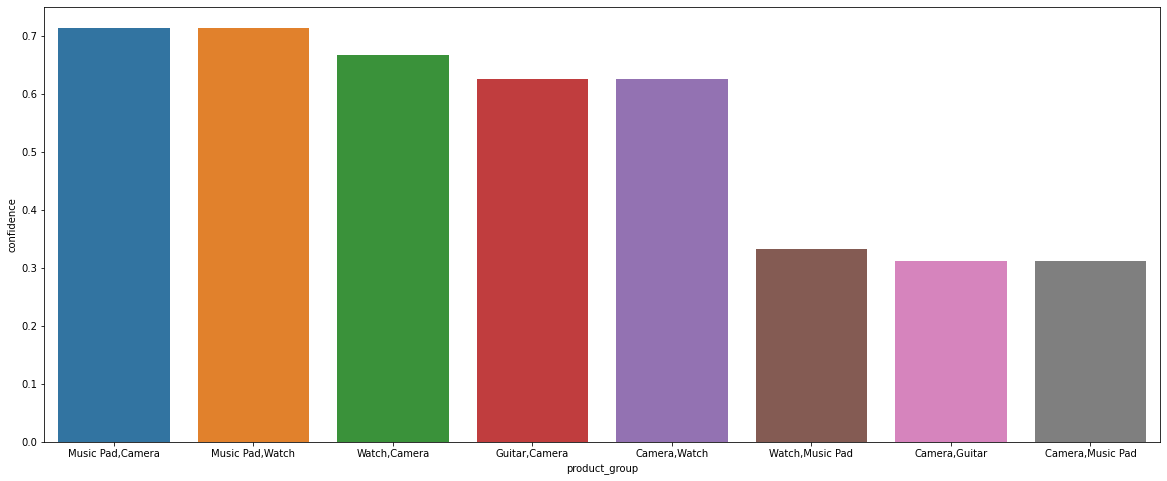

In [145]:
plt.figure(figsize=(20,8))
sns.barplot(x="product_group",y="confidence",data=df_new)
plt.show()

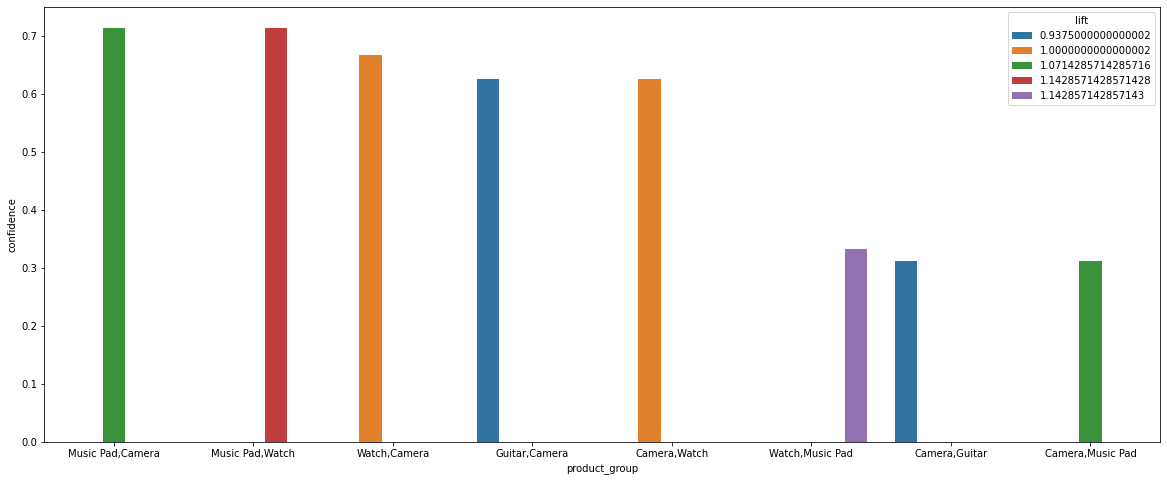

In [146]:
plt.figure(figsize=(20,8))
sns.barplot(x="product_group",y="confidence",hue='lift',data=df_new)
plt.show()

<Figure size 1440x576 with 0 Axes>

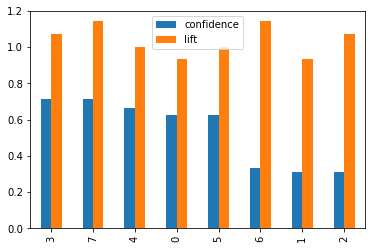

In [147]:
plt.figure(figsize=(20,8))
df_new.plot.bar()
plt.show()

In [ ]:
#conclusion

#71% of customers who buy Music Pad  buy Camera.

#Music Pad and Camera products increase their sales by 2.17 times mutually.

#71% of customers who buy Music Pad buy it in Watch.